In [1]:
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

In [2]:
X = 2 * np.random.rand(100 , 1)

In [3]:
X[:3]

array([[1.73478547],
       [1.33254063],
       [1.9435068 ]])

In [4]:
Y = 4 + 3 * X + np.random.rand(100 , 1) 

In [5]:
Y[:3]

array([[9.47436155],
       [8.56311611],
       [9.89783716]])

<AxesSubplot:>

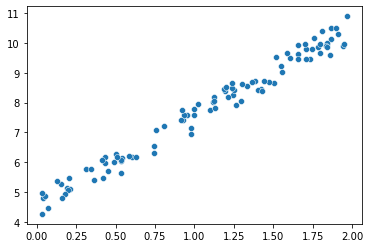

In [6]:
sn.scatterplot(x = X[: , 0], y =  Y[: , 0])

In [7]:
X_b = np.c_[np.ones((100 , 1)) , X]

In [8]:
X_b[:3]

array([[1.        , 1.73478547],
       [1.        , 1.33254063],
       [1.        , 1.9435068 ]])

In [9]:
X[:3]

array([[1.73478547],
       [1.33254063],
       [1.9435068 ]])

In [10]:
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(Y)

In [11]:
theta_best

array([[4.57506488],
       [2.98047965]])

In [12]:
X_new = np.array([[0] , [2]])
X_new

array([[0],
       [2]])

In [13]:
X_new_b = np.c_[(np.ones((2 , 1))) , X_new]
X_new_b

array([[1., 0.],
       [1., 2.]])

In [14]:
Y_predict = X_new_b.dot(theta_best)

In [15]:
Y_predict

array([[ 4.57506488],
       [10.53602418]])

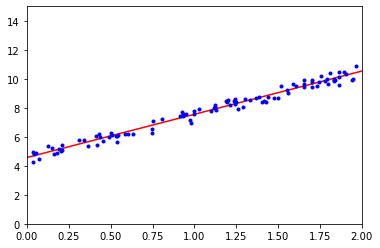

In [16]:
plt.plot(X_new , Y_predict, "r-")
plt.plot(X , Y , "b.")
plt.axis([0 , 2 , 0 ,  15])
plt.show()

# Using Scikit Learn Pakage

In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
lin_reg = LinearRegression()

In [19]:
lin_reg.fit(X , Y)

LinearRegression()

In [20]:
lin_reg.intercept_ , lin_reg.coef_

(array([4.57506488]), array([[2.98047965]]))

In [21]:
lin_reg.predict(X_new)

array([[ 4.57506488],
       [10.53602418]])

In [22]:
theta_best_svd , residual , rank , s = np.linalg.lstsq(X_b , Y , rcond=1e-6)

In [23]:
theta_best_svd

array([[4.57506488],
       [2.98047965]])

In [24]:
residual

array([7.17674459])

In [25]:
rank

2

In [26]:
s

array([15.37710577,  3.83929682])

# Batch Gradient Descent 

In [27]:
eta  = 0.01
n_iterations = 1000
m = 100 #no of parameters

In [28]:
theta = np.random.randn(2 , 1)
theta

array([[0.13270637],
       [0.24907011]])

In [29]:
X_b[:4]

array([[1.        , 1.73478547],
       [1.        , 1.33254063],
       [1.        , 1.9435068 ],
       [1.        , 0.18927469]])

In [30]:
Y[:5]

array([[9.47436155],
       [8.56311611],
       [9.89783716],
       [5.14149349],
       [6.29382121]])

In [31]:
for iteration in range(n_iterations):
    gradients = 2/m* X_b.T.dot(X_b.dot(theta) - Y)
    theta = theta - eta * gradients

In [32]:
theta

array([[4.50168948],
       [3.03847956]])

# Stochastic Gradient Descent 

In [33]:
n_epochs = 50
t0 , t1 = 5 , 50

In [34]:
def learning_schedule(t):
    return t0/(t+t1)

In [35]:
theta = np.random.randn(2 , 1)
theta

array([[-0.4990704 ],
       [ 0.41572115]])

In [36]:
for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index : random_index+1]
        yi = Y[random_index : random_index+1]
        gradient = 2*xi.T.dot(xi.dot(theta)-yi)
        eta = learning_schedule(epoch*m+i)
        theta = theta - eta*gradient

In [37]:
theta

array([[4.57348615],
       [2.98111991]])

In [38]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter = 1000 , tol = 1e-3 , penalty = None  , eta0 = 0.1)

In [39]:
sgd_reg.fit(X  , Y.ravel())

SGDRegressor(eta0=0.1, penalty=None)

In [40]:
sgd_reg.intercept_ , sgd_reg.coef_

(array([4.5689893]), array([2.996316]))

# Polynomial Regression 

In [41]:
m = 100
X = 6*np.random.rand(m , 1)-3
y = 0.5*X**2 + X + 2 + np.random.rand(m ,1 )

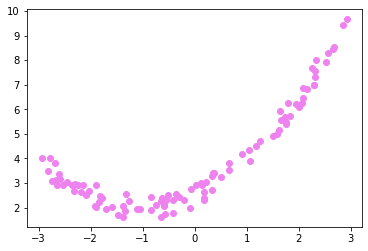

In [42]:
plt.scatter(X  , y , c = 'violet')

In [43]:
from sklearn.preprocessing import PolynomialFeatures

In [44]:
poly_features = PolynomialFeatures(degree = 2 , include_bias= False)
X_poly = poly_features.fit_transform(X)

In [45]:
X[0]

array([-1.0569063])

In [46]:
X_poly[0]

array([-1.0569063 ,  1.11705092])

In [47]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly , y)

LinearRegression()

In [48]:
lin_reg.intercept_ , lin_reg.coef_

(array([2.57422746]), array([[0.98478135, 0.47264112]]))

In [49]:
Y_predict_poly = lin_reg.predict(X_poly)

# Checking Overfitting or UnderFitting Using Learning Curves

In [50]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [51]:
def plot_learning_curves(model , X , y ):
    X_train , X_val , Y_train , Y_val = train_test_split(X , y , test_size= 0.2)
    train_error , val_error = [] , []
    
    for m in range(1, len(X_train)):
        model.fit(X_train[:m] , Y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_error.append(mean_squared_error(Y_train[:m] , y_train_predict))
        val_error.append(mean_squared_error(Y_val , y_val_predict))
    plt.plot(np.sqrt(train_error) , 'r-+' , linewidth = 2  , label = 'train')
    plt.plot(np.sqrt(val_error) , 'b-' , linewidth = 3 , label = 'val')
    plt.legend()
    plt.ylabel("RMSE")
    plt.xlabel("Training Set Size")

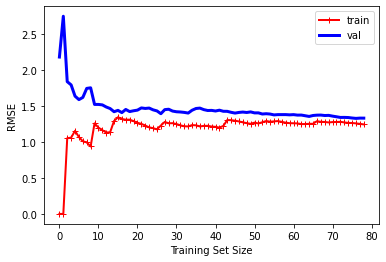

In [52]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg , X , y)

In [53]:
from sklearn.pipeline import Pipeline

In [54]:
polynomial_regression = Pipeline([
    ('poly_features' , PolynomialFeatures(degree = 10  , include_bias=False)),
    ('lin_reg', LinearRegression())
])

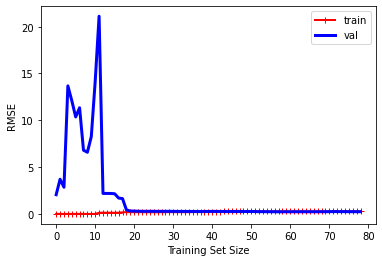

In [55]:
plot_learning_curves(polynomial_regression, X , y)

# Ridge  Regression

In [56]:
from sklearn.linear_model import Ridge

In [57]:
ridge_reg = Ridge(alpha = 1 , solver = 'cholesky')
ridge_reg.fit(X , y)
ridge_reg.predict([[1.5]])

array([[5.38980179]])

In [58]:
# Using Stochastic Gradient Descent 
sgd_reg = SGDRegressor(penalty='l2')
sgd_reg.fit(X  , y.ravel())
sgd_reg.predict([[1.5]])

array([5.37364185])

# Lasso Regression